# Limpieza de datos

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Cargamos los datos
df = pd.read_csv("Copy of datos_censurados.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titulo       2817 non-null   object
 1   descripcion  2817 non-null   object
 2   solucion     1159 non-null   object
 3   categories   2817 non-null   object
 4   fecha        2817 non-null   object
dtypes: object(5)
memory usage: 110.2+ KB


In [3]:
print(df['categories'].value_counts())

categories
ADTR > SCADA                                                               375
ADTR > SCADA > DIS - Desplegados                                           179
ADTR > SCADA > BD - Cambio de Base de Datos                                143
ADTR SP7 > SCADA > Adquisicion de Datos                                    130
ADTR SP7 > SCADA > BASIDI > Desplegados ODV                                124
                                                                          ... 
INTRANET Y SOPORTE DE APLICACIONES > Sistemas Institucionales > PROGNOS      1
ADTR SP7 > SCADA > Limites                                                   1
ADTR > SCADA > THC - Thin Client > THC - Usuarios                            1
ADTR SP7 > SCADA > Redes > Equipos de Redes                                  1
ADTR > SCADA > DIS - Desplegados > DIS - Entrada de Datos                    1
Name: count, Length: 214, dtype: int64


In [4]:
# Función para agrupar las categorías
def agrupar_categoria(row):
    """
    Función para agrupar las categorías en 3 categorías principales
    """

    if 'ADTR SP7 > SIREL' in row:
        return 'ADTR SP7 > SIREL'
    elif 'ADTR SP7 > Historico' in row:
        return 'ADTR SP7 > Historico'
    elif 'ADTR SP7 > Hospedaje' in row:
        return 'ADTR SP7 > Hospedaje'
    elif 'ADTR SP7 > SCADA' in row:
        return 'ADTR SP7 > SCADA'
    elif 'ADTR > Consulta' in row:
        return 'ADTR > Consulta'
    elif 'ADTR > SCADA' in row:
        return 'ADTR SP7 > SCADA'
    elif 'ADOMEM' in row:
        return 'ADOMEM'
    elif 'INTERNET' in row:
        return 'INTERNET'
    elif 'BASE DE DATOS' in row:
        return 'BASE DE DATOS'
    elif 'CORREO ELECTRONICO' in row:
        return 'CORREO ELECTRONICO'
    elif 'COMPUTO Y PERIFERICOS' in row:
        return 'COMPUTO Y PERIFERICOS'
    elif 'DESARROLLO DE APLICACIONES' in row:
        return 'DESARROLLO DE APLICACIONES'
    elif 'INTRANET Y SOPORTE DE APLICACIONES' in row:
        return 'INTRANET Y SOPORTE DE APLICACIONES'
    elif 'SEGURIDAD INFORMATICA' in row:
        return 'SEGURIDAD INFORMATICA'
    elif 'INFRAESTRUCTURA BASICA Y DE SERVICIOS PROPIOS' in row:
        return 'INFRAESTRUCTURA BASICA Y DE SERVICIOS PROPIOS'
    elif 'TELEFONIA Y HERRAMIENTAS COLABORATIVAS' in row:
        return 'TELEFONIA Y HERRAMIENTAS COLABORATIVAS'
    elif 'OPERACION DE RED DE DATOS' in row:
        return 'OPERACION DE RED DE DATOS'
    elif 'ADTR > Hospedaje de Aplicativos de Potencia (EMS)' in row:
        return 'ADTR > Hospedaje de Aplicativos de Potencia (EMS)'
    else:
        return row

In [5]:
# Aplicar la función de agrupación
df['categories'] = df['categories'].apply(agrupar_categoria)
print(df['categories'].value_counts())

categories
ADTR SP7 > SCADA                                     1410
INTRANET Y SOPORTE DE APLICACIONES                    379
COMPUTO Y PERIFERICOS                                 257
SEGURIDAD INFORMATICA                                 166
CORREO ELECTRONICO                                     97
ADTR SP7 > SIREL                                       89
ADTR SP7                                               82
TELEFONIA Y HERRAMIENTAS COLABORATIVAS                 55
INFRAESTRUCTURA BASICA Y DE SERVICIOS PROPIOS          51
ADTR > Consulta                                        38
ADTR SP7 > Historico                                   37
ADTR SP7 > SIGUARD                                     32
INTERNET                                               32
ADTR SP7 > Hospedaje                                   23
ADOMEM                                                 16
ADTR                                                   11
DESARROLLO DE APLICACIONES                             10
OPE

In [6]:
# Calcula el conteo de valores para 'categories'
conteo_categorias = df['categories'].value_counts()

# Filtra las categorías que tienen 20 o más datos
categorias_mayoritarias = conteo_categorias[conteo_categorias >= 20].index

# Utiliza el filtro para obtener un DataFrame con solo las categorías mayoritarias
df_csv = df[df['categories'].isin(categorias_mayoritarias)]

In [7]:
print(df_csv['categories'].value_counts().sort_values())

categories
ADTR SP7 > Hospedaje                               23
INTERNET                                           32
ADTR SP7 > SIGUARD                                 32
ADTR SP7 > Historico                               37
ADTR > Consulta                                    38
INFRAESTRUCTURA BASICA Y DE SERVICIOS PROPIOS      51
TELEFONIA Y HERRAMIENTAS COLABORATIVAS             55
ADTR SP7                                           82
ADTR SP7 > SIREL                                   89
CORREO ELECTRONICO                                 97
SEGURIDAD INFORMATICA                             166
COMPUTO Y PERIFERICOS                             257
INTRANET Y SOPORTE DE APLICACIONES                379
ADTR SP7 > SCADA                                 1410
Name: count, dtype: int64


In [8]:
# Guardar el DataFrame en un archivo CSV
df_csv.to_csv('datos_censurados_agrupados.csv', index=False)

# EDA

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Cargamos los datos
df = pd.read_csv("datos_censurados_agrupados.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titulo       2748 non-null   object
 1   descripcion  2748 non-null   object
 2   solucion     1130 non-null   object
 3   categories   2748 non-null   object
 4   fecha        2748 non-null   object
dtypes: object(5)
memory usage: 107.5+ KB


In [3]:
1130/2748 

0.41120815138282385

In [4]:
# Proporcion de tickets con solución
print(df['solucion'].count()/df['titulo'].count() * 100)

41.12081513828238


In [5]:
df.head()

,titulo,descripcion,solucion,categories,fecha
0,UTR modificada en SAPPSE - GCR Norte,bbc679f62449208c84015282007c04ab aee4727e4ae3...,Solicitud atendida.,INTRANET Y SOPORTE DE APLICACIONES,02/06/2021 09:29
1,Apoyo reubicación OML,Buen día. 789cf27eb6aae36853b201c58e111e0c su ...,NaN,COMPUTO Y PERIFERICOS,02/06/2021 13:45
2,Problemática enlace ICCP d9434c3c9d9a321ea4e6f...,Cuando el 67092e14637ab9281f943eaa9f6797b0 est...,En varias ocasiones se ha identificado que cua...,ADTR SP7 > SCADA,02/06/2021 11:30
3,Actualización de desplegado NNR,Favor de actualizar el desplegado SCADA de NNR...,Se puso la señal en desplegado y se solicitó a...,ADTR SP7 > SCADA,02/06/2021 16:19
4,RV: Gestionar buzón compartido de correo para ...,"5a4bcb095f3936badc27e5d580dedd86, buen día Par...",NaN,CORREO ELECTRONICO,02/06/2021 20:02


In [6]:
# Agregamos una nueva característica que sea
# la cantidad de palabras en el Titulo, Descripción y Solución

df['cantidad de palabras en título'] = df['titulo'].str.split().str.len()
df['cantidad de palabras en descripción'] = df['descripcion'].str.split().str.len()
df['cantidad de palabras en solución'] = df['solucion'].str.split().str.len()

df.head()

,titulo,descripcion,solucion,categories,fecha,cantidad de palabras en título,cantidad de palabras en descripción,cantidad de palabras en solución
0,UTR modificada en SAPPSE - GCR Norte,bbc679f62449208c84015282007c04ab aee4727e4ae3...,Solicitud atendida.,INTRANET Y SOPORTE DE APLICACIONES,02/06/2021 09:29,7,43,2.0
1,Apoyo reubicación OML,Buen día. 789cf27eb6aae36853b201c58e111e0c su ...,NaN,COMPUTO Y PERIFERICOS,02/06/2021 13:45,3,71,NaN
2,Problemática enlace ICCP d9434c3c9d9a321ea4e6f...,Cuando el 67092e14637ab9281f943eaa9f6797b0 est...,En varias ocasiones se ha identificado que cua...,ADTR SP7 > SCADA,02/06/2021 11:30,12,86,119.0
3,Actualización de desplegado NNR,Favor de actualizar el desplegado SCADA de NNR...,Se puso la señal en desplegado y se solicitó a...,ADTR SP7 > SCADA,02/06/2021 16:19,4,45,23.0
4,RV: Gestionar buzón compartido de correo para ...,"5a4bcb095f3936badc27e5d580dedd86, buen día Par...",NaN,CORREO ELECTRONICO,02/06/2021 20:02,10,124,NaN


In [325]:
# Función para graficar una gráfica de conteos de una variable numérica
def plot_count_distribution(data, x, xmax=None, extra_text=None):
    """
    Función para graficar la distribución de una variable numérica mediante un histograma.

    Parámetros:
    - data: DataFrame con los datos.
    - x: Nombre de la variable numérica a graficar.
    - xmax: Tuple opcional para definir el rango del eje x (mín, máx).
    - extra_text: Texto adicional opcional para incluir en la gráfica.
    """
    plt.figure(figsize=(8, 5))
    
    # Histograma de conteos
    ax = sns.histplot(data=data, x=x, bins=35, kde=False)
    plt.axvline(data[x].mean(), color='red', linestyle='--', label=f'Media: {data[x].mean():.2f}')
    
    # Ajuste del rango del eje x
    if xmax:
        plt.xlim(right=xmax)

    # Opcional: quitar las marcas de los ejes
    ax.tick_params(left=False, bottom=True)
    
    # Etiquetas y título
    plt.xlabel('cantidad de palabras')
    plt.ylabel('')
    plt.title(f'Distribución de {x}')
    
    # Agregar texto adicional como caption si se proporciona
    if extra_text:
        # Colocar el texto en la parte inferior como caption
        plt.figtext(0.57, -0.01, extra_text, ha='right', va='center', fontsize=10, color='gray', style='oblique')



    # Quitar los bordes de la gráfica
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.legend()
    
    plt.tight_layout()
    plt.show()



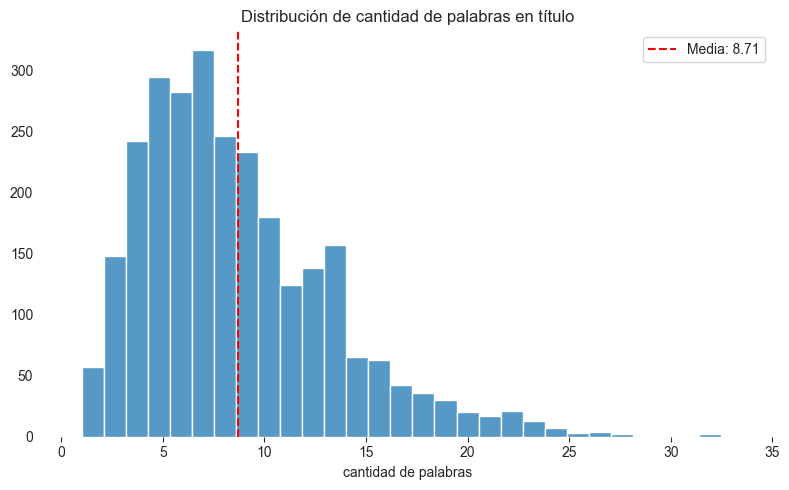

In [326]:
plot_count_distribution(df, 'cantidad de palabras en título', 35)

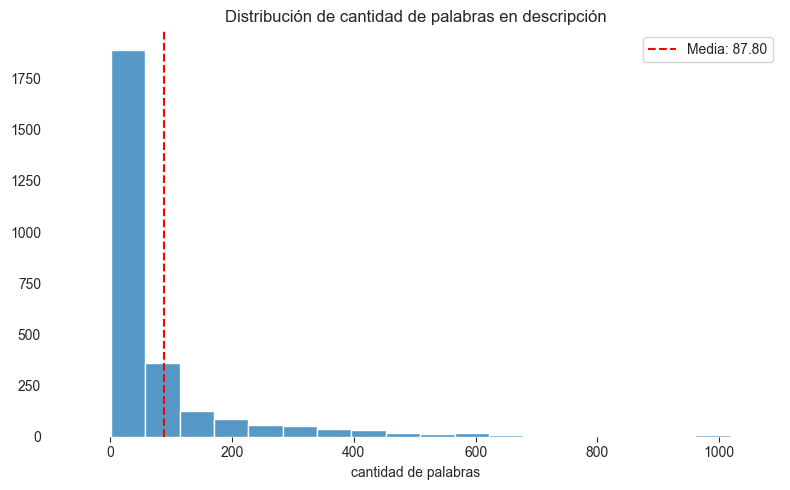

In [327]:
plot_count_distribution(df, 'cantidad de palabras en descripción', 1100)

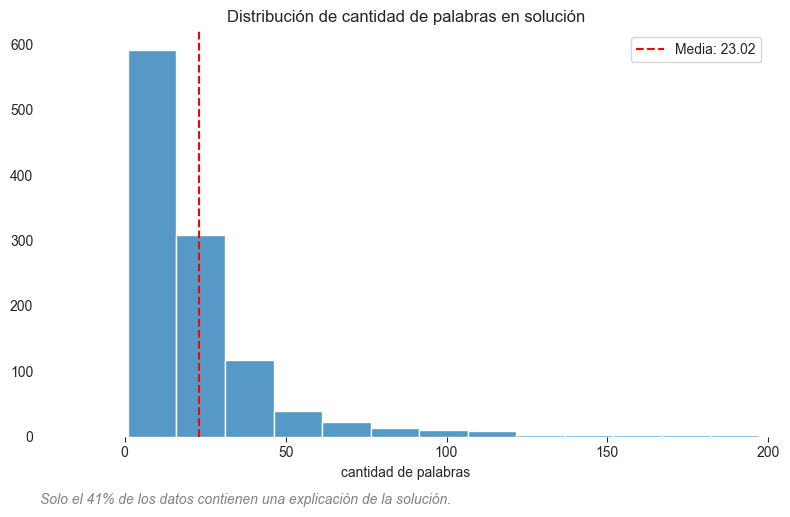

In [329]:
plot_count_distribution(df, 'cantidad de palabras en solución', 200, extra_text= f"Solo el 41% de los datos contienen una explicación de la solución.")

In [7]:
import nltk
# import gensim
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Descargar los datos necesarios para lematización, tokenización y stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
def preprocess_text(df, column_name):
    '''
    Toma un DataFrame y el nombre de una columna de texto y
    devuelve una lista de textos preprocesados.
    '''
    preprocessed_corpus = []
    lem = WordNetLemmatizer()
    stop_words = set(stopwords.words('spanish'))

    for news in df[column_name]:
        # Comprobamos si el valor es NaN o float
        if isinstance(news, str):
            words = [w for w in word_tokenize(news) if w.lower() not in stop_words]
            words = [lem.lemmatize(w) for w in words if len(w) > 2]
            preprocessed_text = ' '.join(words)
            preprocessed_corpus.append(preprocessed_text)
        else:
            # Si es NaN o float, añadimos una cadena vacía al corpus
            preprocessed_corpus.append('')

    return preprocessed_corpus


def get_top_ngram(corpus, n=None):  
    '''
    Toma una lista de textos y devuelve las n-gramas más comunes.
    '''
    
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)                               # Vectoriza los textos
    bag_of_words = vec.transform(corpus)                                                # Cuenta las palabras
    sum_words = bag_of_words.sum(axis=0)                                                # Suma las palabras             
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]   # Crea una lista de tuplas con las palabras y su frecuencia
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)                   # Ordena la lista de tuplas por frecuencia
    return words_freq[:10]

def plot_ngram(data, columna):
    # Establecer el estilo sin bordes
    sns.set_style("white")
    
    plt.figure(figsize=(14, 7))
    
    # Crear una paleta de colores para las barras (por ejemplo, del azul claro al azul oscuro)
    palette = sns.color_palette("Blues", n_colors=len(data))[::-1] 
    
    # Crear el gráfico de barras con la paleta de colores
    ax = sns.barplot(
        x='frequency', 
        y='ngram', 
        data=data, 
        palette=palette,  # Aplicar la paleta
        alpha=0.95,
        hue='ngram',
    )
    
    # Título rotado a la izquierda
    plt.title(f'Los bigramas más comunes en la columna {columna} de los tickets',
               pad=10, fontsize=22, color='black', ha='right', va='center')

    # Eliminar las etiquetas de los ejes
    ax.set_xlabel('')
    ax.set_ylabel('')

  # Ajustar el color, grosor y tamaño de las etiquetas del eje Y
    for label in ax.get_yaxis().get_ticklabels():
        label.set_color('black')  # Establecer color negro
        label.set_fontsize(16)  # Incrementar el tamaño de la fuente (ajusta este valor según lo desees)


    # Opcional: quitar las marcas de los ejes
    ax.tick_params(left=False, bottom=True)

    # Quitar los bordes de la gráfica
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()  # Asegurarse de que no haya elementos cortados
    plt.show()

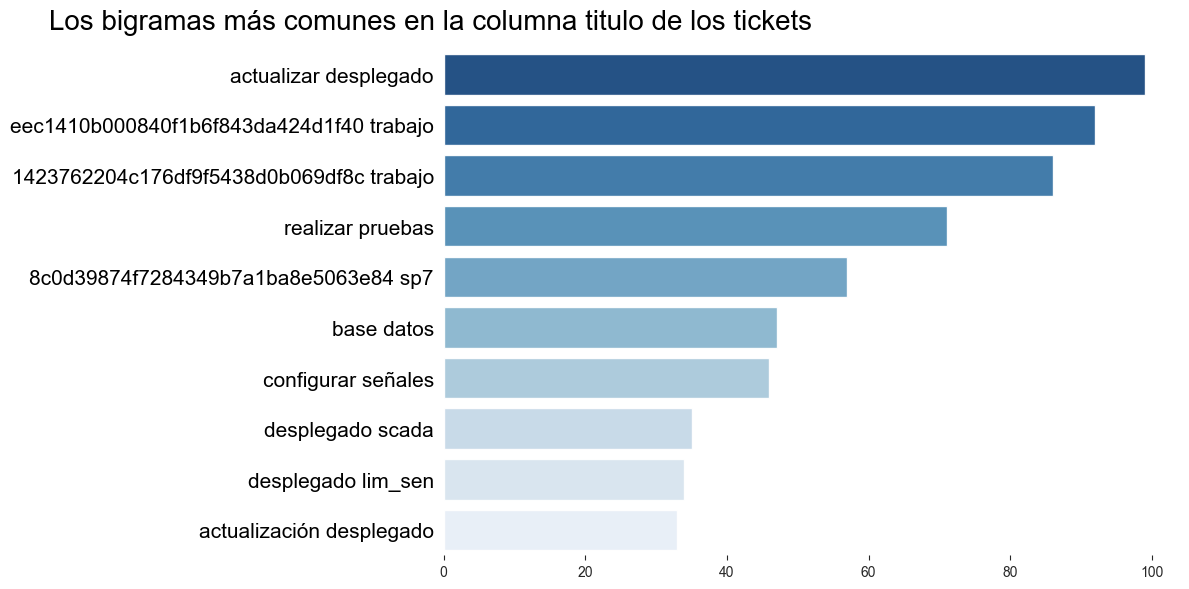

In [104]:
# Extraer los textos de la columna 'Título' en una lista
corpus_Titulo = preprocess_text(df, 'titulo')

# Obtener los n-gramas más frecuentes (por ejemplo, bigramas)
top_titulo_ngrams = get_top_ngram(corpus_Titulo, n=2)

# Convertir los resultados a un DataFrame para facilitar la visualización
top_ngrams_df = pd.DataFrame(top_titulo_ngrams, columns=['ngram', 'frequency'])

top_ngrams_df.reset_index(drop=True, inplace=True)
plot_ngram(top_ngrams_df, 'titulo')

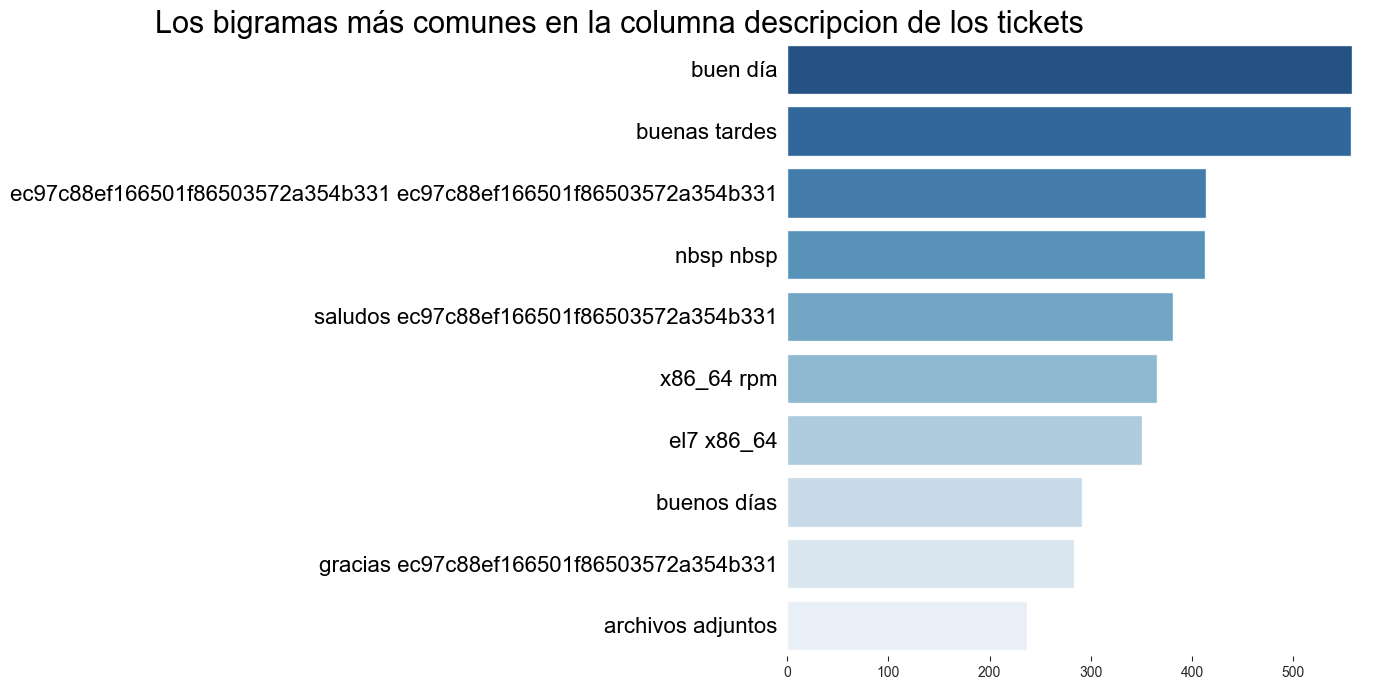

In [121]:
corpus_servicio = preprocess_text(df, 'descripcion')

# Obtener los n-gramas más frecuentes (por ejemplo, bigramas)
top_servicio_ngrams = get_top_ngram(corpus_servicio, n=2)

# Convertir los resultados a un DataFrame para facilitar la visualización
top_ngrams_df = pd.DataFrame(top_servicio_ngrams, columns=['ngram', 'frequency'])

# Crear un gráfico de barras
plot_ngram(top_ngrams_df, 'descripcion')

In [27]:
conteo = df['descripcion'].str.contains(r'\xa0\(\.\.\.\)\xa0').sum()

print(f"Numero de incidencias en Descripción que contienen el término xa0(...)xa0: {conteo}")

Numero de incidencias en Descripción que contienen el término xa0(...)xa0: 0


# Modelos de Clasificacion

In [34]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import torch
from transformers import AutoTokenizer, AutoModel

np.random.seed(0)
stop_words = set(stopwords.words('spanish'))

In [ ]:
# Agregar palabras a la lista de stopwords
stop_words.update(['adjuntos',
 'archivos',
 'buen',
 'buenas',
 'buenos',
 'dias',
 'día',
 'días',
 'nbsp',
 'tardes',
 'trabajo',
 'nbsp'])

In [36]:
df_csv = pd.read_csv('datos_censurados_agrupados.csv')
df_csv = df_csv[['titulo', 'descripcion', 'categories']]
df_csv.dropna(inplace=True)
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titulo       2748 non-null   object
 1   descripcion  2748 non-null   object
 2   categories   2748 non-null   object
dtypes: object(3)
memory usage: 64.5+ KB


In [37]:
df_csv['texto_completo'] = df_csv['titulo'] + ' ' + df_csv['descripcion']
df_csv.drop(columns=['titulo', 'descripcion'], inplace=True)
df_csv['texto_completo'] = df_csv['texto_completo'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)).lower())

In [38]:
le = LabelEncoder()
df_csv['categories'] = le.fit_transform(df_csv['categories'])

In [39]:
vectorizer_sin_stopwords = TfidfVectorizer(stop_words=None, max_features=None)
vectorizer_con_stopwords = TfidfVectorizer(stop_words=list(stop_words), max_features=None)

In [40]:
vectorizer_con_stopwords

TfidfVectorizer(stop_words=['seamos', 'hayamos', 'tengo', 'mucho', 'tuviste',
                            'estar', 'habría', 'tengamos', 'durante', 'eres',
                            'habríais', 'estaréis', 'estarías', 'tuyos',
                            'estuvieron', 'eran', 'desde', 'hubo', 'ya',
                            'tuvieron', 'tendría', 'fuera', 'estáis', 'quien',
                            'estaremos', 'mío', 'les', 'míos', 'un', 'tendrá', ...])

In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelname = "jinaai/jina-embeddings-v2-base-es"
tokenizer = AutoTokenizer.from_pretrained(modelname)
model = AutoModel.from_pretrained(modelname, trust_remote_code=True).to(device)  # Transfiere a GPU

In [30]:
def embeddingCreator(textos):
    embeddings = []
    for texto in textos:
        # Tokenizar el texto
        inputs = tokenizer(texto, padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            # Pasar los tokens al modelo
            outputs = model(**inputs)

            # Calcular el embedding como la media de las representaciones
            embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

            # Guardar el embedding en la lista
            embeddings.append(embedding)
            
    # Convertir a matriz de NumPy para su uso posterior
    embeddings = np.array(embeddings)
    return embeddings

In [44]:
textos = df_csv['texto_completo'].tolist()

In [31]:
embeddings_con_stopwords = embeddingCreator(textos)
embeddings_con_stopwords

array([[-0.05940885, -0.04882956, -0.14187653, ...,  0.01254945,
         0.09431057, -0.04349442],
       [-0.11685541, -0.08524828, -0.01066759, ...,  0.17490888,
         0.11507978, -0.15202446],
       [-0.01135568, -0.02036758, -0.09888748, ..., -0.02165007,
        -0.20496273,  0.20620273],
       ...,
       [-0.08409042, -0.10390501,  0.1504318 , ..., -0.15800339,
        -0.11782065, -0.01895648],
       [-0.17147116, -0.25443807,  0.11849371, ..., -0.11162955,
        -0.05275797,  0.20933132],
       [-0.3708888 , -0.01881693, -0.05783268, ..., -0.05405208,
        -0.04877637,  0.06411859]], dtype=float32)

In [32]:
textos_sin_stopwords = [' '.join([word for word in text.split() if word not in stop_words]) for text in textos]
embeddings_sin_stopwords = embeddingCreator(textos_sin_stopwords)
embeddings_sin_stopwords

array([[-0.01899014, -0.14686191, -0.13451654, ...,  0.07842997,
         0.02819299, -0.08949447],
       [-0.01072474, -0.21037494,  0.07693125, ...,  0.07720315,
         0.17893095, -0.2600364 ],
       [-0.07014454, -0.1876139 ,  0.06509311, ..., -0.04717632,
        -0.11434671,  0.01230044],
       ...,
       [ 0.06691066, -0.19310564,  0.14656273, ..., -0.11838429,
        -0.05629049, -0.03017245],
       [-0.13833216, -0.30006287,  0.08796809, ..., -0.03821541,
        -0.05036723,  0.31010687],
       [-0.29216456, -0.21729979,  0.01925812, ..., -0.07633969,
         0.14780037,  0.11668076]], dtype=float32)

In [56]:
# Función que imprime la matriz de confusión y la curva ROC
def plot_confusion_matrix_and_roc(X_test, y_test, y_pred, model, le):
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d',  cmap='Blues', cbar=False)
    plt.xlabel('Etiqueta predicha')
    plt.ylabel('Etiqueta verdadera')
    plt.title('Matriz de confusión')
    plt.show()

    # Curva ROC
    y_pred_proba = model.predict_proba(X_test)

    fpr = {}
    tpr = {}
    thresh = {}

    n_class = len(le.classes_)

    plt.figure(figsize=(8, 8))
    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

    plt.figure(figsize=(12, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]}')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# **Pruebas**

## **Prueba 1**
- Eliminamos puntuaciones
- Convertimos a minusculas
- Utilizamos un modelo especifico de embedding
- No quitamos stopwords

In [37]:
X = embeddings_con_stopwords
y = df_csv['categories']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Modelos

#### Logistic Regression

In [40]:
# Definir el modelo de regresión logística
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced')

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'C': np.arange(0.1, 10.1, 0.1),  # Regularización
    'solver': ['lbfgs', 'newton-cg']  # Algoritmo de optimización
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                         'solver': ['lbfgs', 'newton-cg']},
             scoring='f1_weighted', verbose=1)

In [41]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {grid_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'C': 9.5, 'solver': 'newton-cg'}
Puntaje de precisión en validación cruzada: 0.7068
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.20      0.38      0.26         8
                                     ADTR SP7       0.19      0.31      0.24        16
                         ADTR SP7 > Historico       0.18      0.29      0.22         7
                         ADTR SP7 > Hospedaje       0.00      0.00      0.00         5
                             ADTR SP7 > SCADA       0.87      0.78      0.82       282
                           ADTR SP7 > SIGUARD       0.75      1.00      0.86         6
                             ADTR SP7 > SIREL       1.00      0.72      0.84        18
                        COMPUTO Y PERIFERICOS       0.78      0.77      0.78        52
                           CORREO ELECTRONICO       0.68      0.75      0.71        20
INFRAESTRUCT

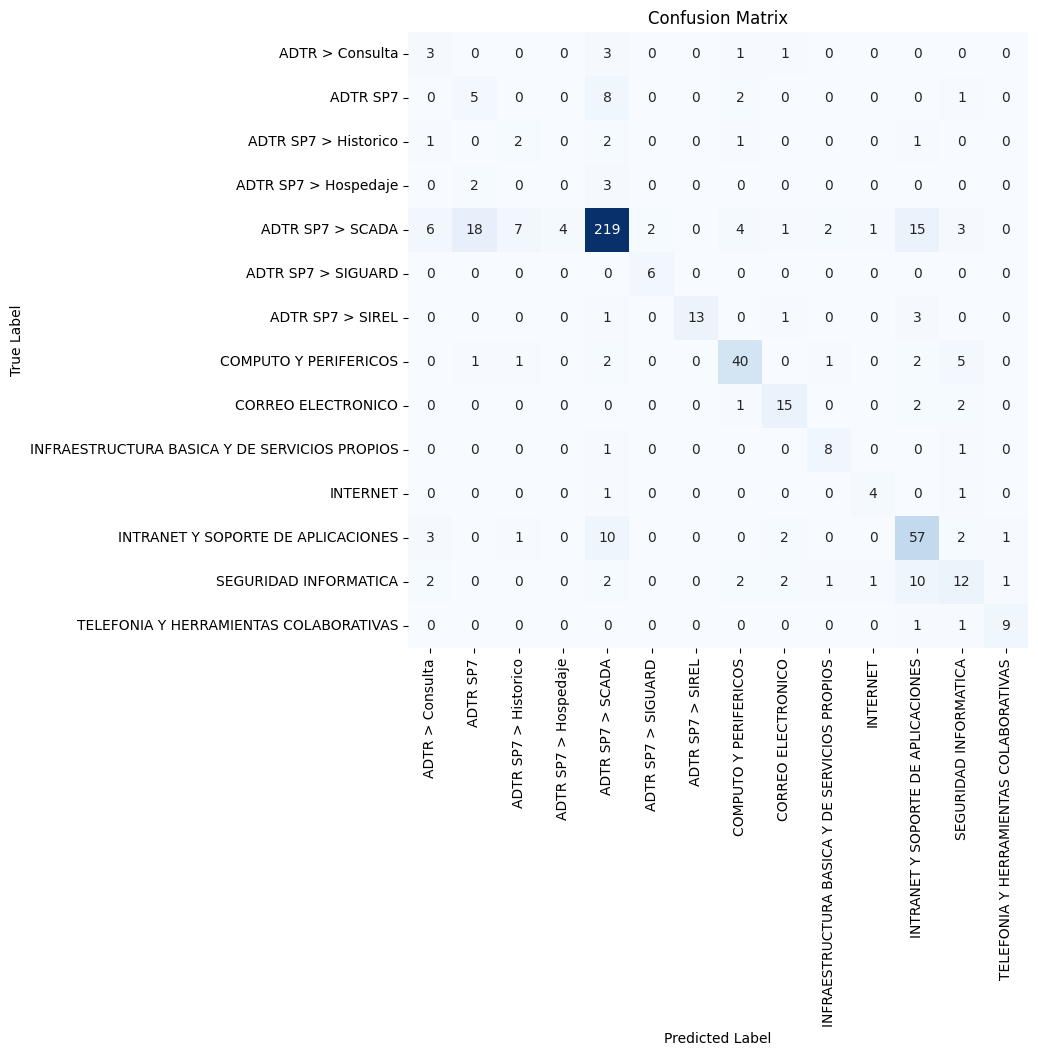

<Figure size 800x800 with 0 Axes>

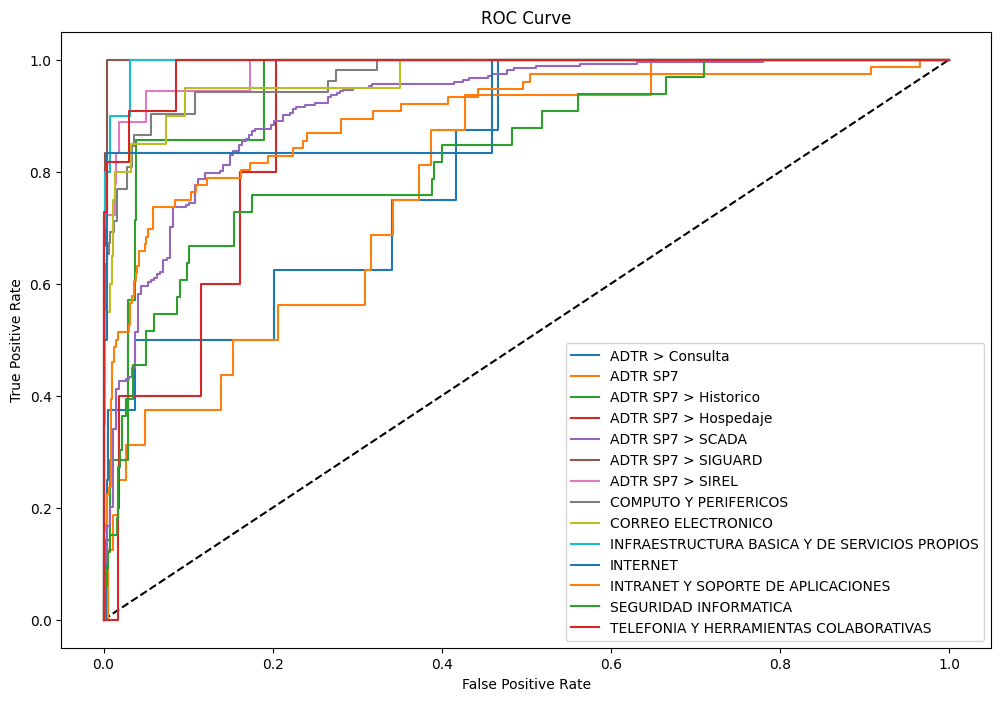

In [42]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, grid_search.best_estimator_, le.classes_)

#### SVM

In [44]:
# Definir el modelo de SVM
svm = SVC(probability=True, random_state=0, class_weight='balanced')

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'C': np.arange(0.1, 10.1, 0.5),  # Regularización
    'kernel': ['linear', 'sigmoid'],  # Tipo de kernel
}

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=10, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1, random_state=0)

# Ajustar GridSearchCV con los datos de entrenamiento
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=SVC(class_weight='balanced', probability=True,
                                 random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
                                        'kernel': ['linear', 'sigmoid']},
                   random_state=0, scoring='f1_weighted', verbose=1)

In [46]:
# Obtener los mejores parámetros y el mejor score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Mejores parámetros encontrados: {best_params}")
print(f"Puntaje de precisión en validación cruzada: {best_score:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = random_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'kernel': 'linear', 'C': 2.6}
Puntaje de precisión en validación cruzada: 0.7076
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.27      0.50      0.35         8
                                     ADTR SP7       0.13      0.19      0.15        16
                         ADTR SP7 > Historico       0.25      0.29      0.27         7
                         ADTR SP7 > Hospedaje       0.00      0.00      0.00         5
                             ADTR SP7 > SCADA       0.85      0.84      0.85       282
                           ADTR SP7 > SIGUARD       0.67      0.67      0.67         6
                             ADTR SP7 > SIREL       0.87      0.72      0.79        18
                        COMPUTO Y PERIFERICOS       0.90      0.88      0.89        52
                           CORREO ELECTRONICO       0.61      0.70      0.65        20
INFRAESTRUCTURA

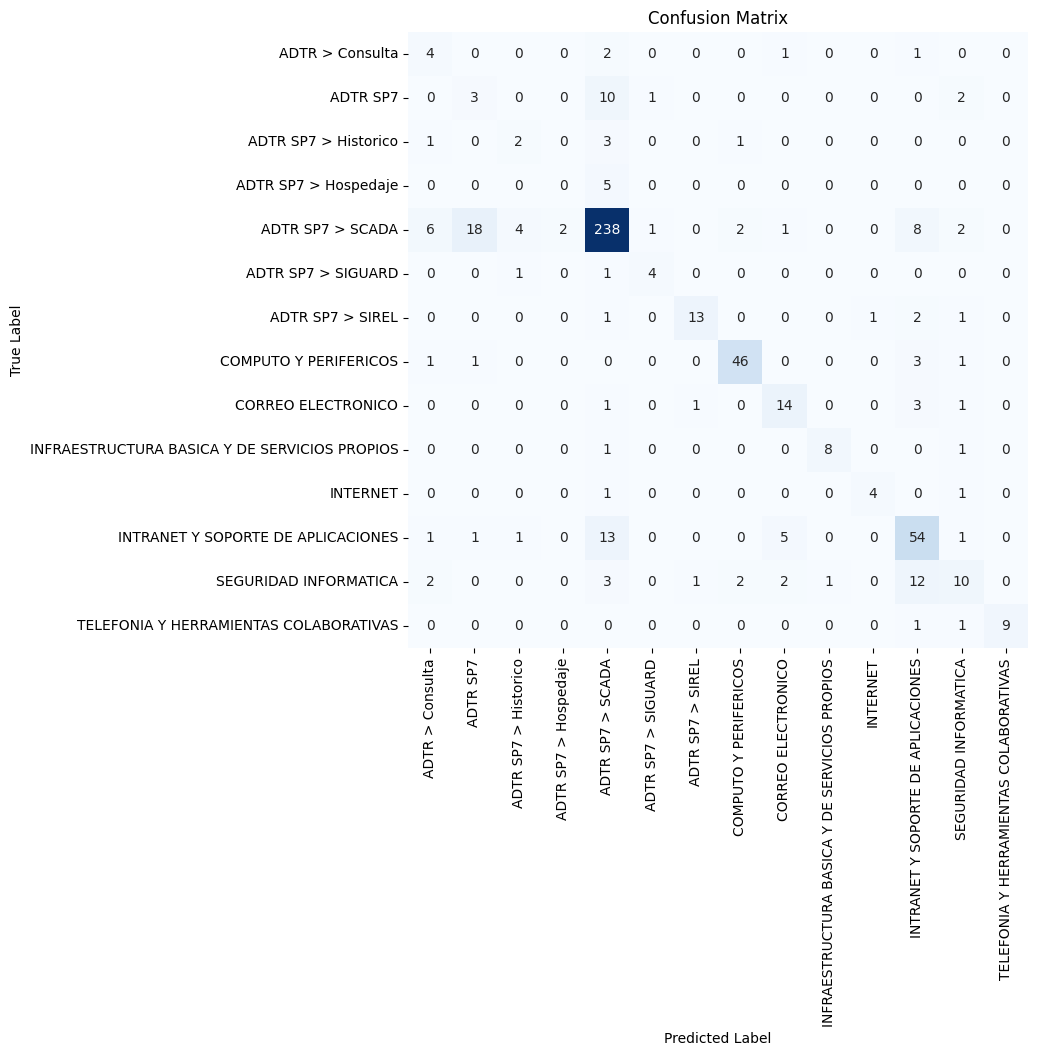

<Figure size 800x800 with 0 Axes>

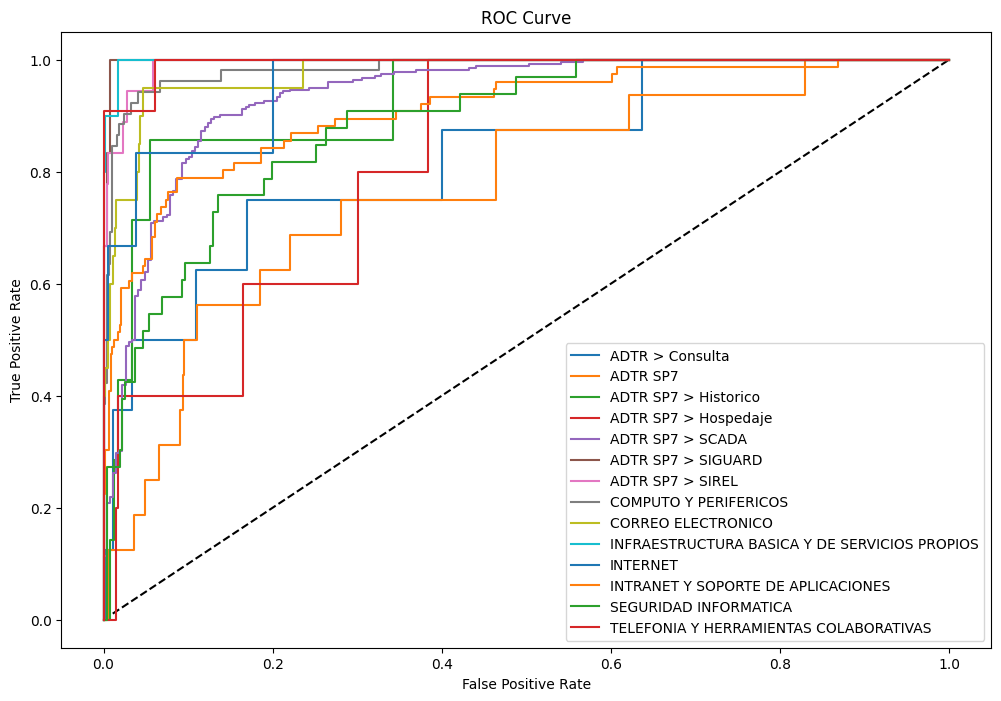

In [47]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, random_search.best_estimator_, le.classes_)

## **Prueba 2**
* Eliminamos puntuaciones
* Convertimos a minusculas
* Utilizamos un modelo especifico de embedding
* Quitamos stopwords

In [48]:
X = embeddings_sin_stopwords
y = df_csv['categories']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Modelos

#### Logistic Regression

In [51]:
# Definir el modelo de regresión logística
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced')

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'C': np.arange(0.1, 10.1, 0.1),  # Regularización
    'solver': ['lbfgs', 'newton-cg']  # Algoritmo de optimización
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                         'solver': ['lbfgs', 'newton-cg']},
             scoring='f1_weighted', verbose=1)

In [52]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {grid_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'C': 1.9000000000000001, 'solver': 'lbfgs'}
Puntaje de precisión en validación cruzada: 0.6774
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.22      0.50      0.31         8
                                     ADTR SP7       0.22      0.38      0.28        16
                         ADTR SP7 > Historico       0.17      0.29      0.21         7
                         ADTR SP7 > Hospedaje       0.00      0.00      0.00         5
                             ADTR SP7 > SCADA       0.89      0.76      0.82       282
                           ADTR SP7 > SIGUARD       0.50      0.67      0.57         6
                             ADTR SP7 > SIREL       1.00      0.78      0.88        18
                        COMPUTO Y PERIFERICOS       0.78      0.77      0.78        52
                           CORREO ELECTRONICO       0.76      0.80      0.78        20
I

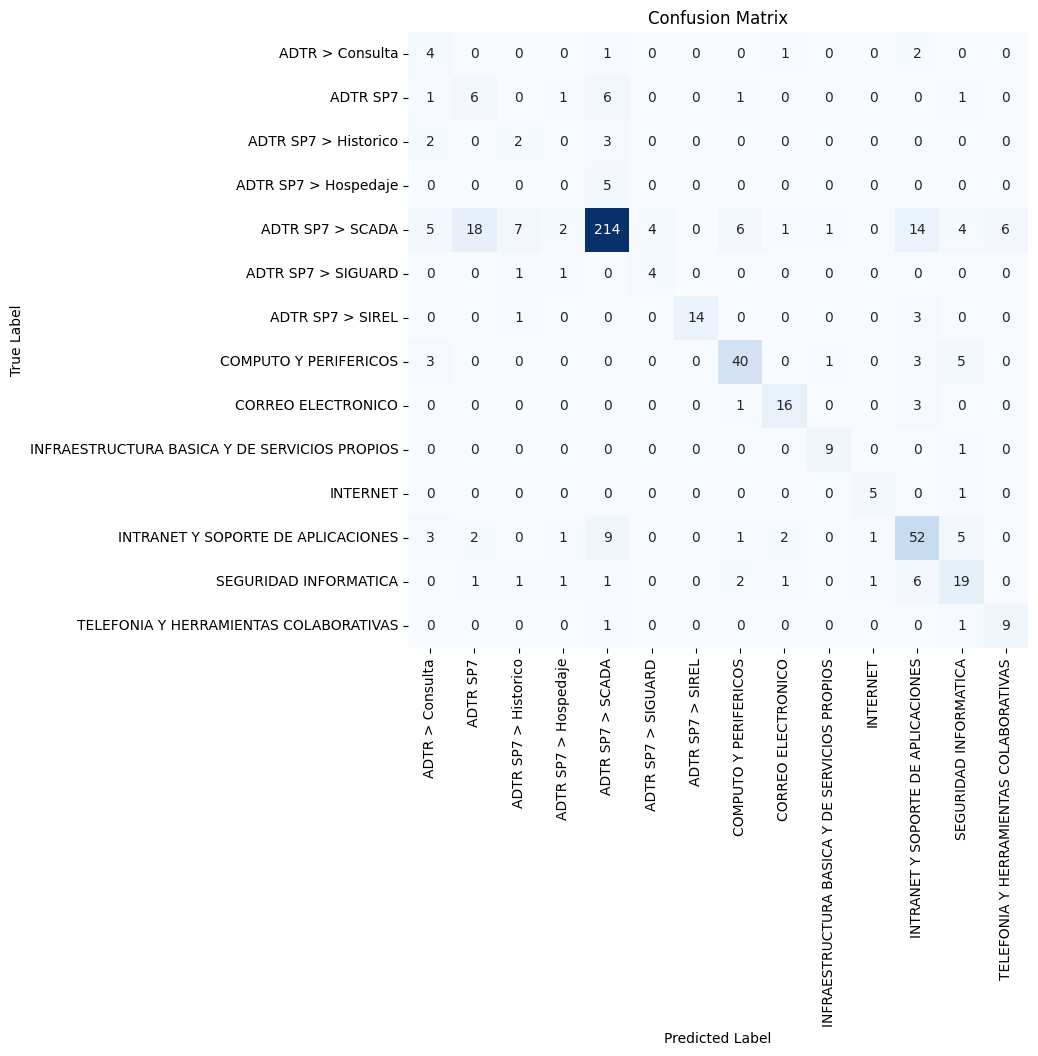

<Figure size 800x800 with 0 Axes>

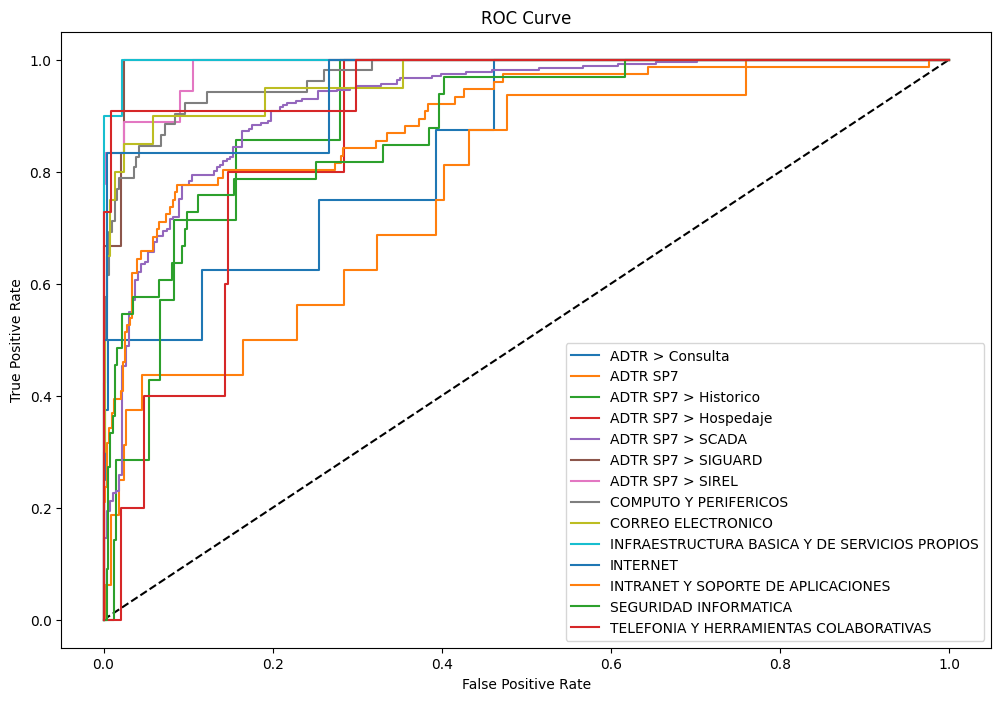

In [53]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, grid_search.best_estimator_, le.classes_)

#### SVM

In [54]:
# Definir el modelo de SVM
svm = SVC(probability=True, random_state=0, class_weight='balanced')

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'C': np.arange(0.1, 10.1, 0.5),  # Regularización
    'kernel': ['linear', 'sigmoid'],  # Tipo de kernel
}

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=SVC(class_weight='balanced', probability=True,
                                 random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
                                        'kernel': ['linear', 'sigmoid']},
                   scoring='f1_weighted', verbose=1)

In [55]:
# Obtener los mejores parámetros y el mejor score
print(f"Mejores parámetros encontrados: {random_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {random_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = random_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names= le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'kernel': 'linear', 'C': 1.1}
Puntaje de precisión en validación cruzada: 0.6892
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.30      0.38      0.33         8
                                     ADTR SP7       0.15      0.19      0.17        16
                         ADTR SP7 > Historico       0.10      0.14      0.12         7
                         ADTR SP7 > Hospedaje       0.00      0.00      0.00         5
                             ADTR SP7 > SCADA       0.84      0.82      0.83       282
                           ADTR SP7 > SIGUARD       0.80      0.67      0.73         6
                             ADTR SP7 > SIREL       1.00      0.61      0.76        18
                        COMPUTO Y PERIFERICOS       0.77      0.79      0.78        52
                           CORREO ELECTRONICO       0.74      0.70      0.72        20
INFRAESTRUCTURA

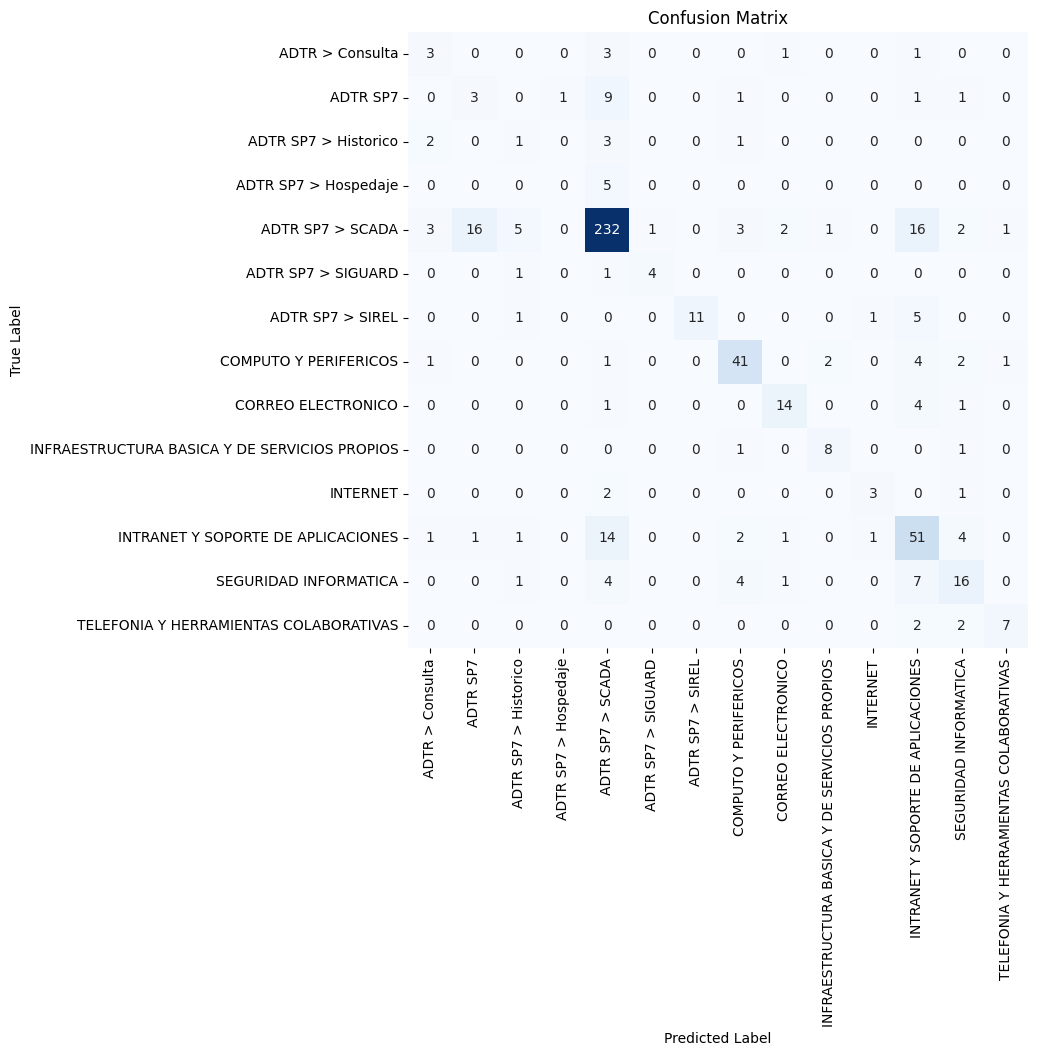

<Figure size 800x800 with 0 Axes>

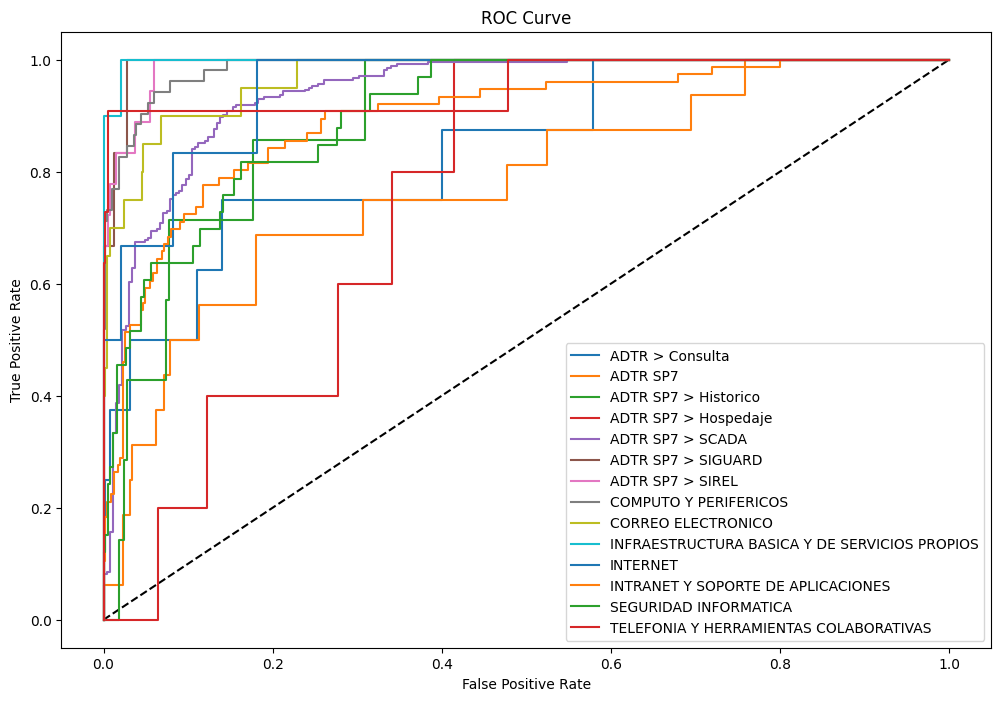

In [56]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, random_search.best_estimator_, le.classes_)

## **Prueba 3**
* Eliminamos puntuaciones
* Convertimos a minusculas
* Utilizamos TfidVectorizer
* No quitamos stopwords

In [45]:
X = vectorizer_con_stopwords.fit_transform(textos)
y = df_csv['categories']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Modelos

#### Logistic Regression

In [71]:
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced')

param_grid = {
    'C': np.arange(0.1, 10.1, 0.1),
    'solver': ['lbfgs', 'newton-cg']
}

grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                         'solver': ['lbfgs', 'newton-cg']},
             scoring='f1_weighted', verbose=1)

In [72]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {grid_search.best_score_:.4f}")

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'C': 10.0, 'solver': 'lbfgs'}
Puntaje de precisión en validación cruzada: 0.7699
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.33      0.25      0.29         8
                                     ADTR SP7       0.20      0.06      0.10        16
                         ADTR SP7 > Historico       0.50      0.43      0.46         7
                         ADTR SP7 > Hospedaje        nan      0.00      0.00         5
                             ADTR SP7 > SCADA       0.87      0.94      0.90       282
                           ADTR SP7 > SIGUARD       0.83      0.83      0.83         6
                             ADTR SP7 > SIREL       1.00      0.72      0.84        18
                        COMPUTO Y PERIFERICOS       0.77      0.83      0.80        52
                           CORREO ELECTRONICO       0.81      0.85      0.83        20
INFRAESTRUCTURA

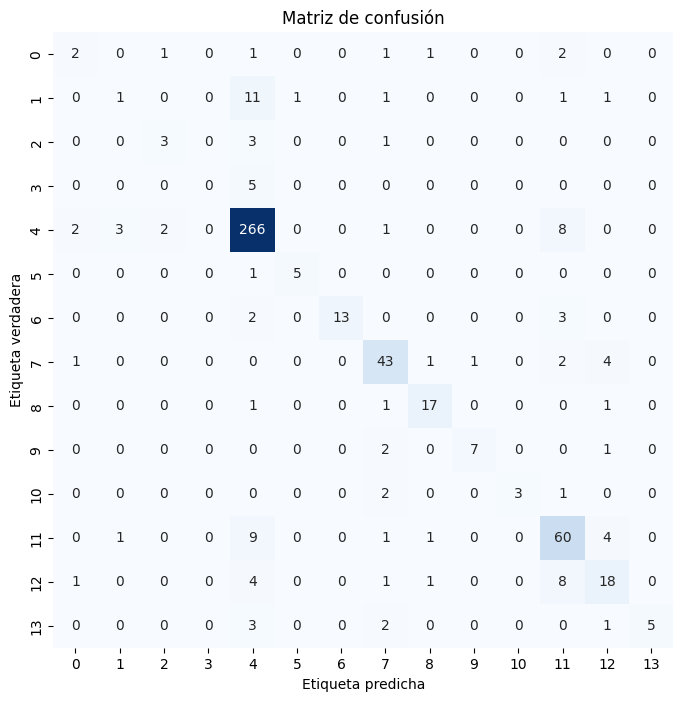

<Figure size 800x800 with 0 Axes>

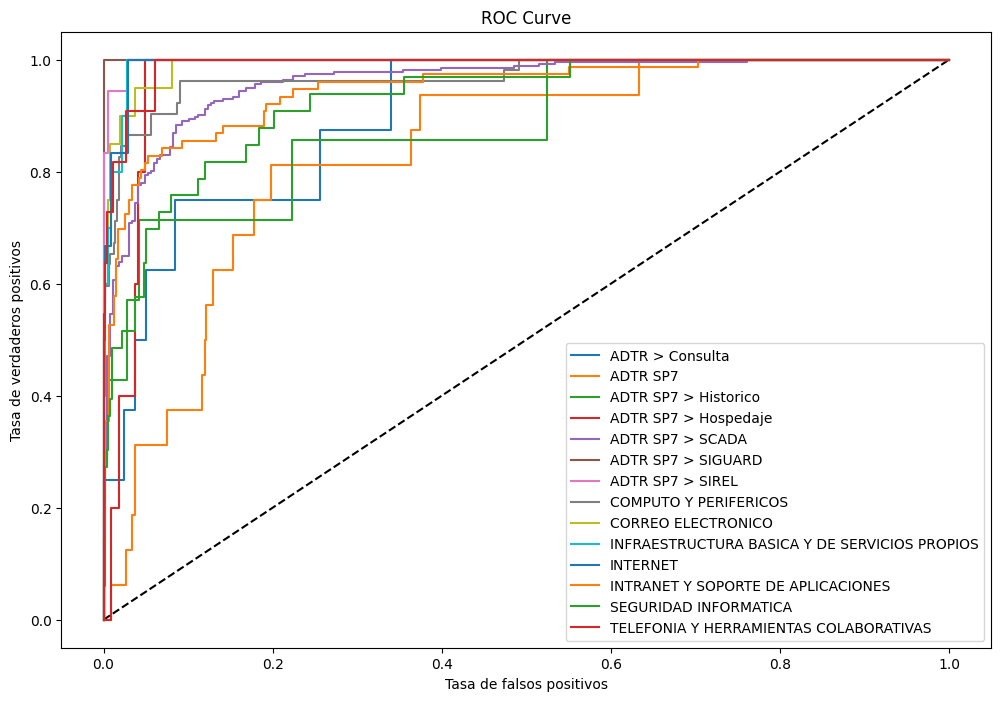

In [73]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, grid_search.best_estimator_, le)

#### SVM

In [85]:
svm = SVC(probability=True, random_state=0, class_weight='balanced')

param_grid = {
    'C': np.arange(0.1, 10.1, 0.5),
    'kernel': ['linear', 'sigmoid']
}

random_search = RandomizedSearchCV(estimator = svm, param_distributions = param_grid, cv = cv, scoring = 'f1_weighted', verbose = 1, n_jobs = -1)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=SVC(class_weight='balanced', probability=True,
                                 random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
                                        'kernel': ['linear', 'sigmoid']},
                   scoring='f1_weighted', verbose=1)

In [86]:
# Obtener los mejores parámetros y el mejor score
print(f"Mejores parámetros encontrados: {random_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {random_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = random_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names= le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'kernel': 'sigmoid', 'C': 1.6}
Puntaje de precisión en validación cruzada: 0.7627
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.20      0.25      0.22         8
                                     ADTR SP7       0.08      0.06      0.07        16
                         ADTR SP7 > Historico       0.43      0.43      0.43         7
                         ADTR SP7 > Hospedaje       0.00      0.00      0.00         5
                             ADTR SP7 > SCADA       0.88      0.89      0.89       282
                           ADTR SP7 > SIGUARD       0.86      1.00      0.92         6
                             ADTR SP7 > SIREL       1.00      0.56      0.71        18
                        COMPUTO Y PERIFERICOS       0.79      0.79      0.79        52
                           CORREO ELECTRONICO       0.83      0.75      0.79        20
INFRAESTRUCTUR

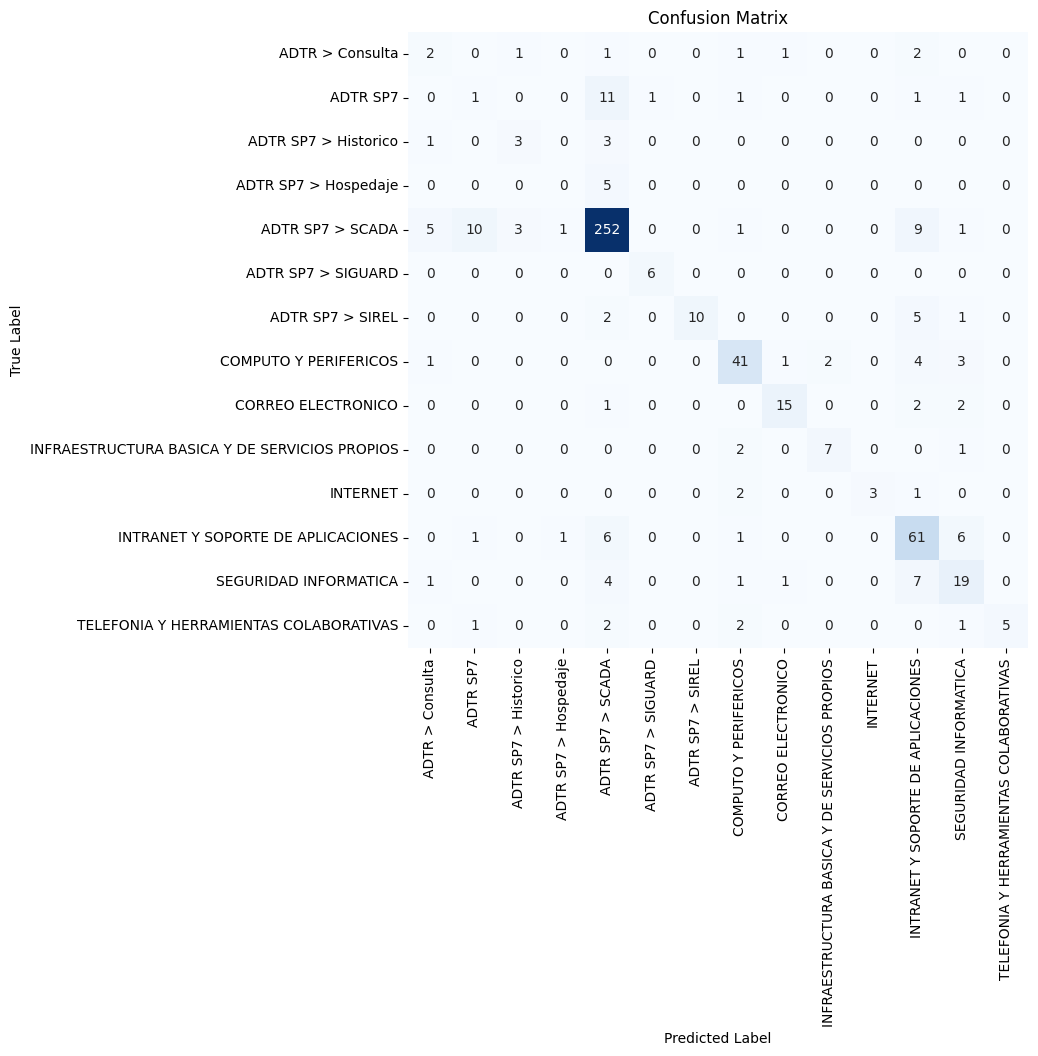

<Figure size 800x800 with 0 Axes>

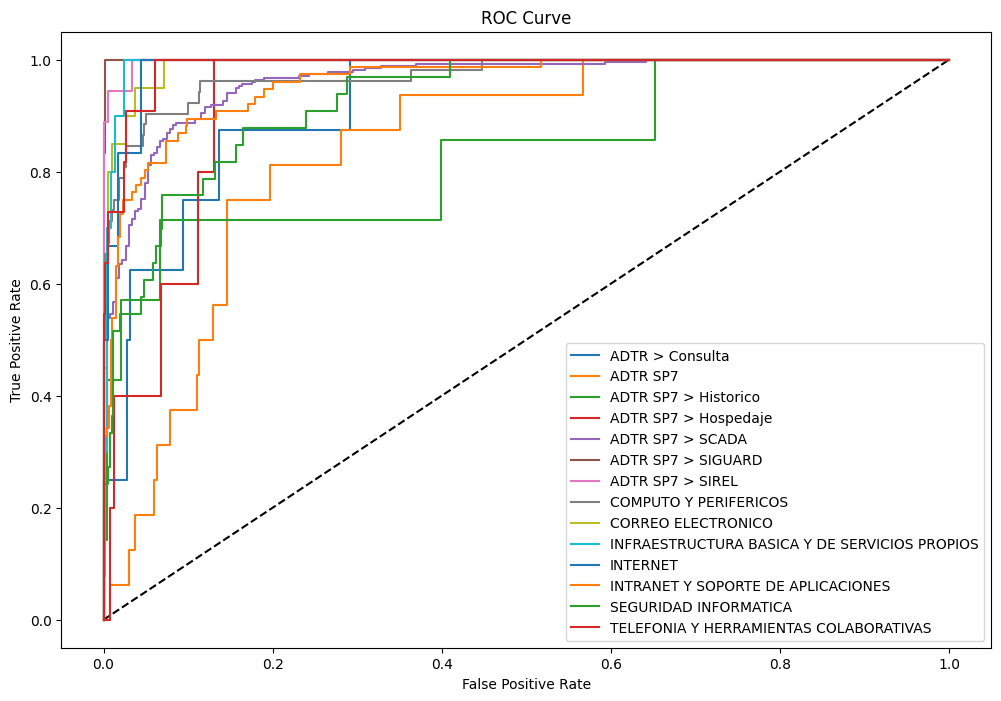

In [87]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, random_search, le.classes_)

#### Multinomial Naive Bayes

In [88]:
# Definir el modelo de Naive Bayes
naive_bayes = MultinomialNB()

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'alpha': np.arange(0.1, 10.1, 0.1),  # Suavizado de Laplace
    'fit_prior': [True, False]  # Si se debe aprender la probabilidad a priori
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                         'fit_prior': [True, False]},
             scoring='f1_weighted', verbose=1)

In [89]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {grid_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'alpha': 0.1, 'fit_prior': False}
Puntaje de precisión en validación cruzada: 0.7167
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.67      0.25      0.36         8
                                     ADTR SP7       0.25      0.19      0.21        16
                         ADTR SP7 > Historico       0.25      0.14      0.18         7
                         ADTR SP7 > Hospedaje       0.50      0.20      0.29         5
                             ADTR SP7 > SCADA       0.88      0.87      0.88       282
                           ADTR SP7 > SIGUARD       0.50      0.50      0.50         6
                             ADTR SP7 > SIREL       0.77      0.56      0.65        18
                        COMPUTO Y PERIFERICOS       0.68      0.90      0.78        52
                           CORREO ELECTRONICO       0.81      0.65      0.72        20
INFRAESTRUC

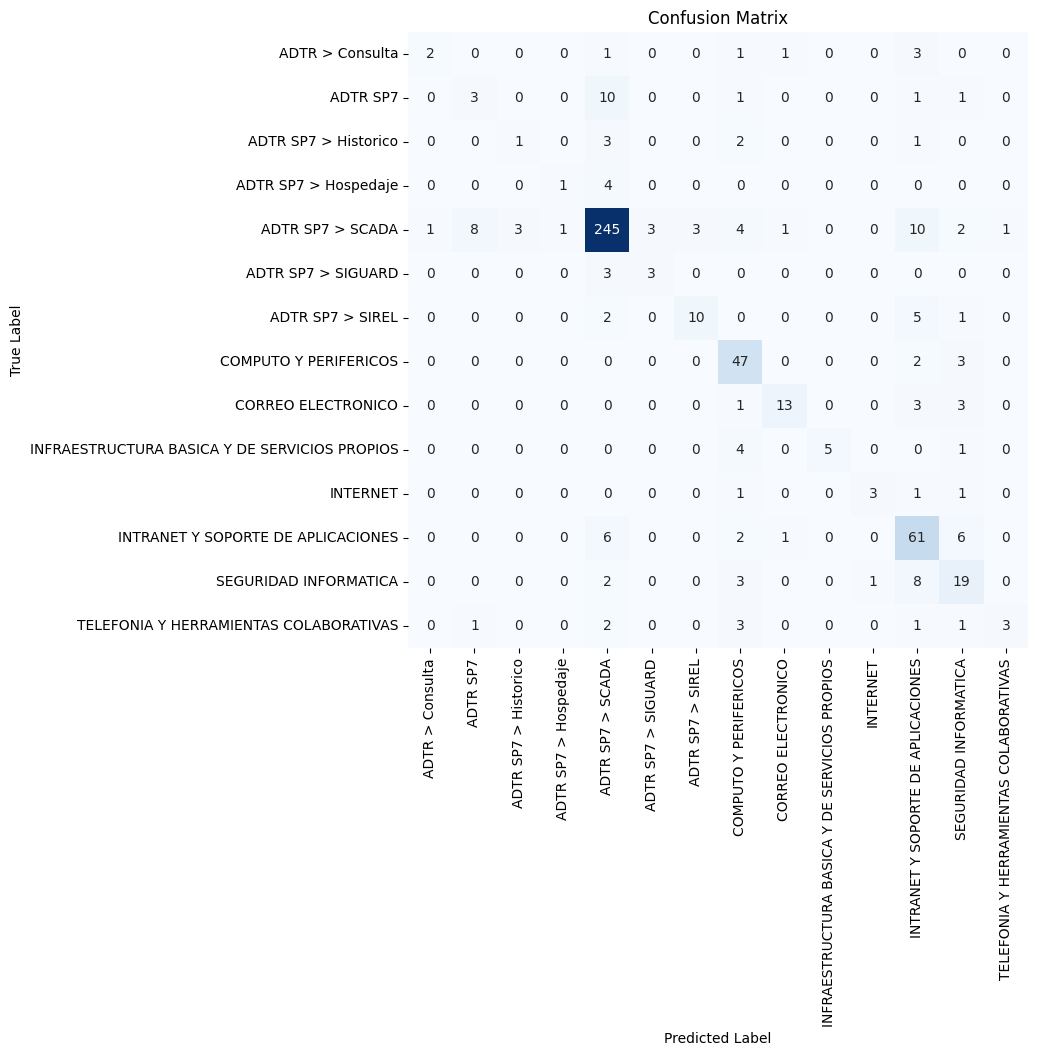

<Figure size 800x800 with 0 Axes>

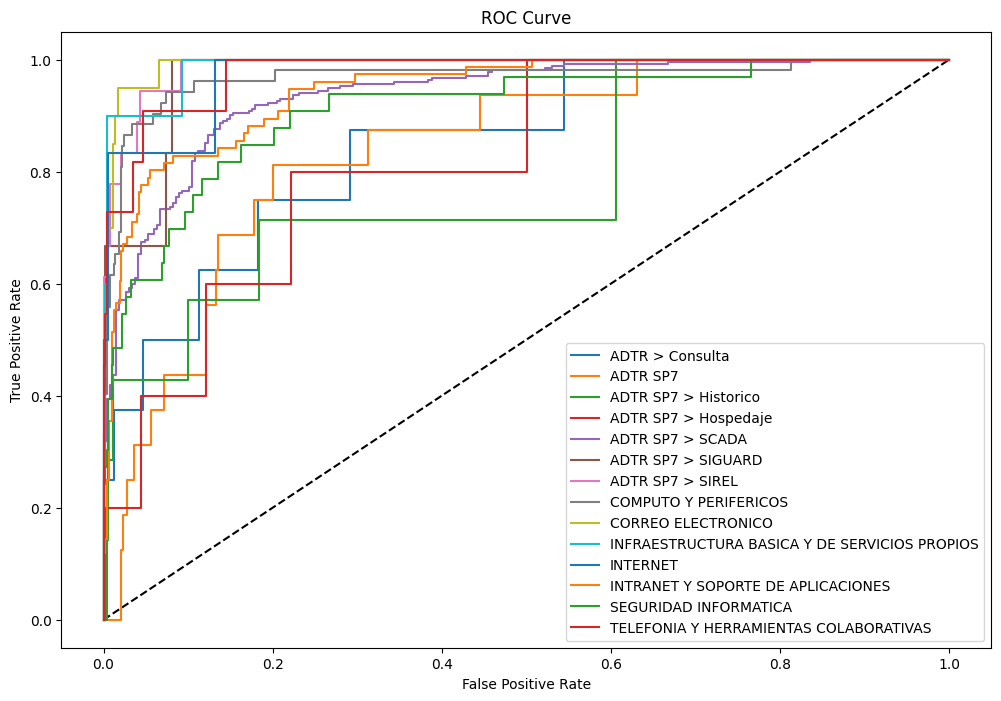

In [90]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, grid_search.best_estimator_,  le.classes_)

## **Prueba 4**
* Eliminamos puntuaciones
* Convertimos a minusculas
* Utilizamos TfidVectorizer
* Quitamos stopwords

In [62]:
X = vectorizer_sin_stopwords.fit_transform(textos)
y = df_csv['categories']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Modelos

#### Logistic Regression

In [64]:
# Definir el modelo de regresión logística
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced')

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'C': np.arange(0.1, 10, 1),  # Regularización
    'solver': ['lbfgs', 'newton-cg']  # Algoritmo de optimización
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             param_grid={'C': array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1]),
                         'solver': ['lbfgs', 'newton-cg']},
             scoring='f1_weighted', verbose=1)

In [65]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {grid_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'C': 6.1, 'solver': 'lbfgs'}
Puntaje de precisión en validación cruzada: 0.7636
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.25      0.25      0.25         8
                                     ADTR SP7       0.20      0.12      0.15        16
                         ADTR SP7 > Historico       0.43      0.43      0.43         7
                         ADTR SP7 > Hospedaje       0.00      0.00      0.00         5
                             ADTR SP7 > SCADA       0.87      0.91      0.89       282
                           ADTR SP7 > SIGUARD       0.83      0.83      0.83         6
                             ADTR SP7 > SIREL       1.00      0.67      0.80        18
                        COMPUTO Y PERIFERICOS       0.79      0.85      0.81        52
                           CORREO ELECTRONICO       0.85      0.85      0.85        20
INFRAESTRUCTURA 

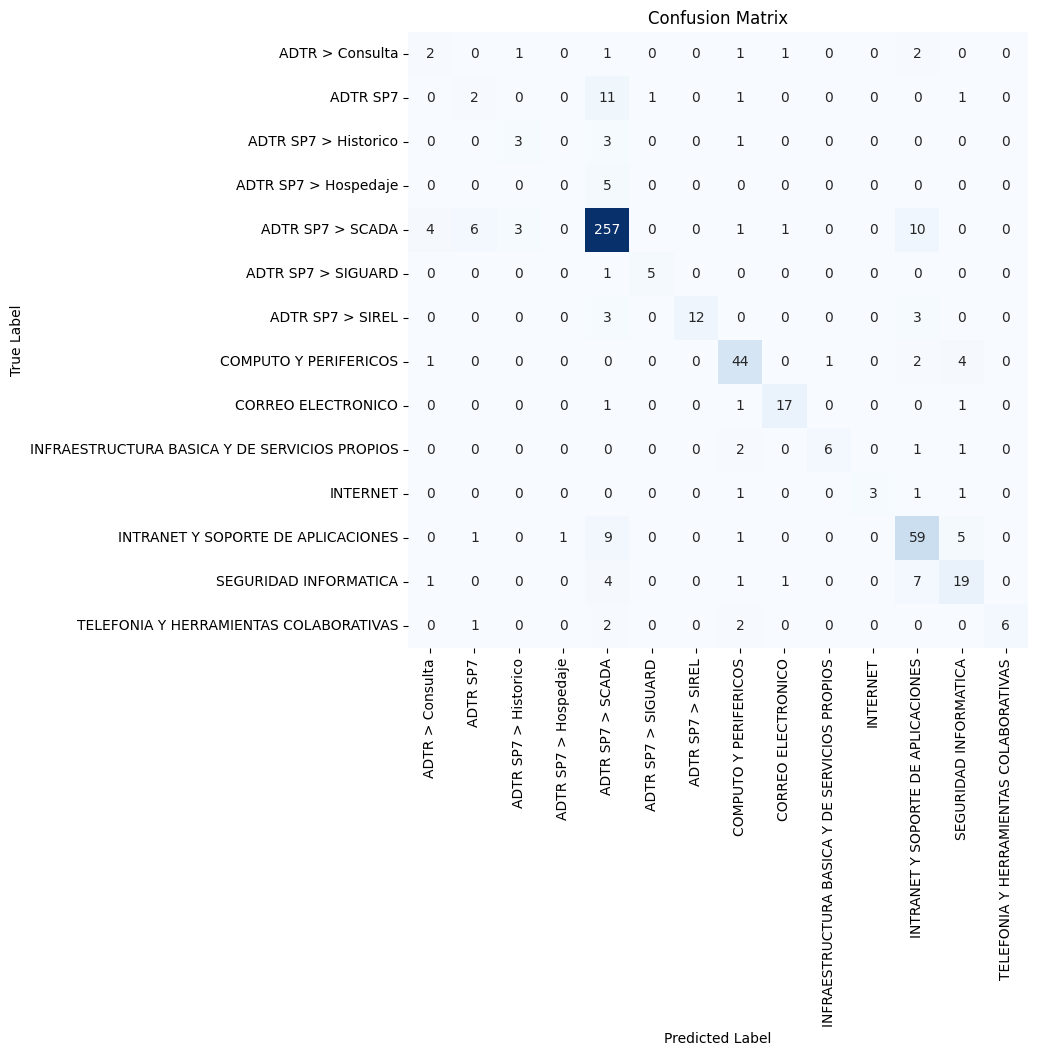

<Figure size 800x800 with 0 Axes>

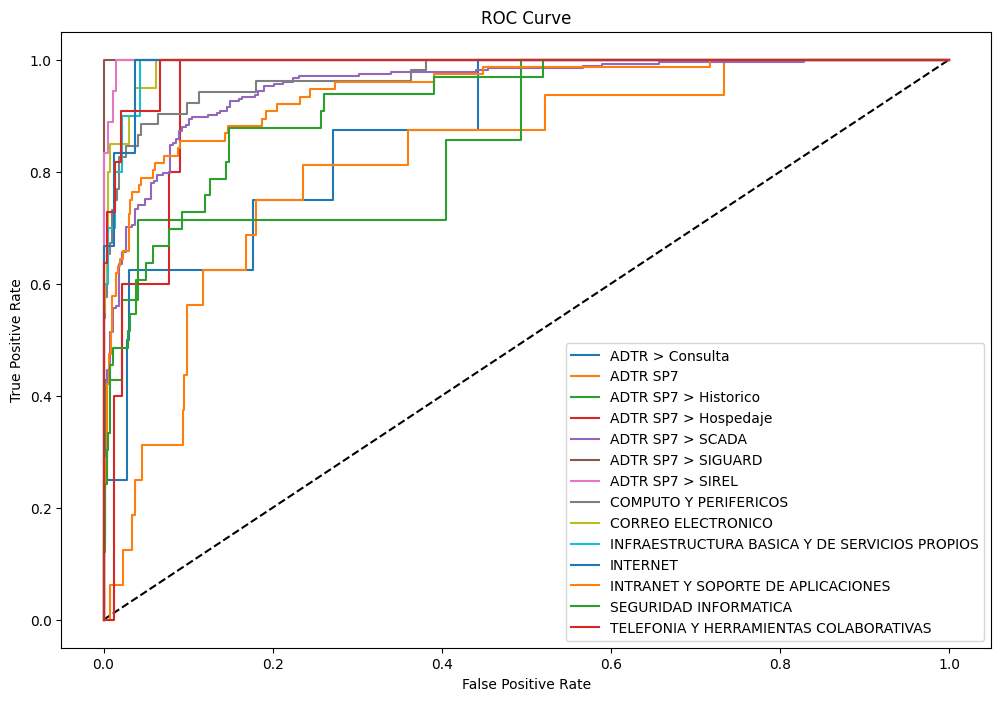

In [66]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, grid_search, le.classes_)

#### SVM

In [67]:
svm = SVC(probability=True, random_state=0, class_weight='balanced')

param_grid = {
    'C': np.arange(0.1, 10.1, 0.5),
    'kernel': ['linear', 'sigmoid']
}

random_search = RandomizedSearchCV(estimator = svm, param_distributions = param_grid, cv = cv, scoring = 'f1_weighted', verbose = 1, n_jobs = -1)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=SVC(class_weight='balanced', probability=True,
                                 random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
                                        'kernel': ['linear', 'sigmoid']},
                   scoring='f1_weighted', verbose=1)

In [68]:
# Obtener los mejores parámetros y el mejor score
print(f"Mejores parámetros encontrados: {random_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {random_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = random_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names= le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'kernel': 'sigmoid', 'C': 3.1}
Puntaje de precisión en validación cruzada: 0.7608
                                               precision    recall  f1-score   support

                              ADTR > Consulta       0.22      0.25      0.24         8
                                     ADTR SP7       0.14      0.06      0.09        16
                         ADTR SP7 > Historico       0.75      0.43      0.55         7
                         ADTR SP7 > Hospedaje       0.00      0.00      0.00         5
                             ADTR SP7 > SCADA       0.86      0.92      0.89       282
                           ADTR SP7 > SIGUARD       0.83      0.83      0.83         6
                             ADTR SP7 > SIREL       1.00      0.56      0.71        18
                        COMPUTO Y PERIFERICOS       0.79      0.81      0.80        52
                           CORREO ELECTRONICO       0.82      0.70      0.76        20
INFRAESTRUCTUR

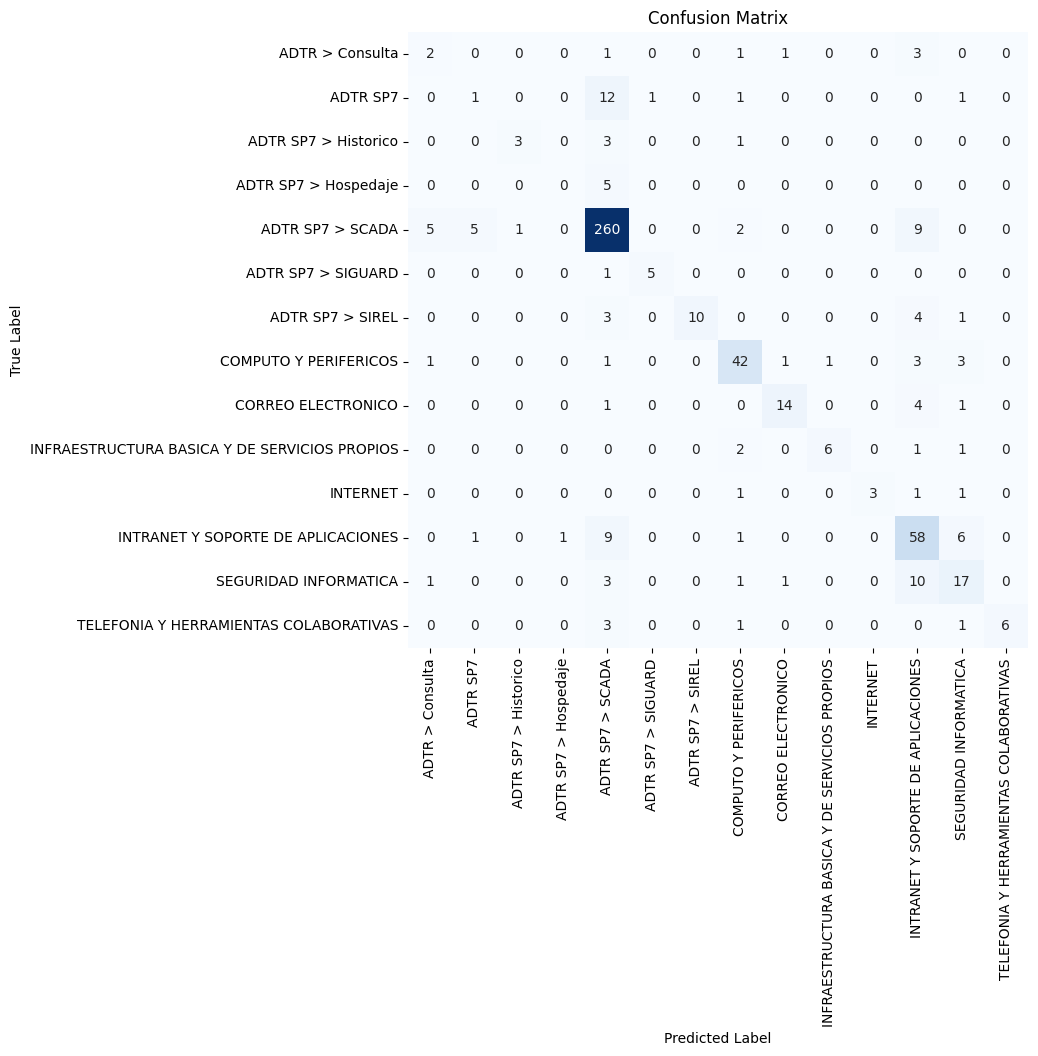

<Figure size 800x800 with 0 Axes>

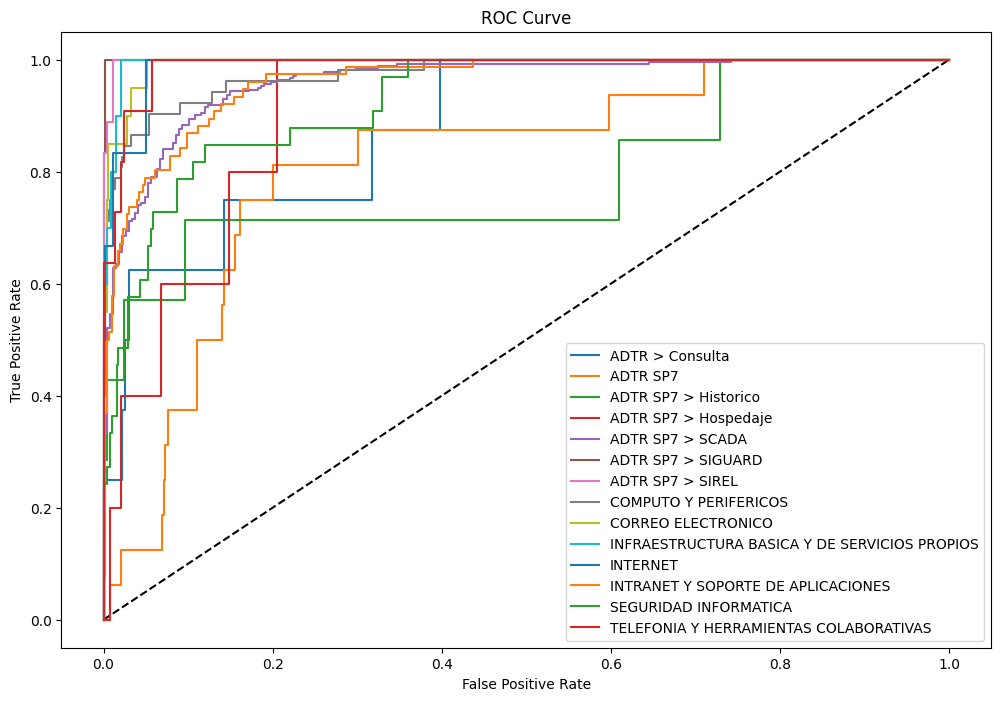

In [69]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, random_search, le.classes_)

#### Multinomial Naive Bayes

In [70]:
# Definir el modelo de Naive Bayes
naive_bayes = MultinomialNB()

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'alpha': np.arange(0.1, 10.1, 0.1),  # Suavizado de Laplace
    'fit_prior': [True, False]  # Si se debe aprender la probabilidad a priori
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                         'fit_prior': [True, False]},
             scoring='f1_weighted', verbose=1)

In [71]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Puntaje de precisión en validación cruzada: {grid_search.best_score_:.4f}")

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=np.nan))

Mejores parámetros encontrados: {'alpha': 0.1, 'fit_prior': False}
Puntaje de precisión en validación cruzada: 0.6847
                                               precision    recall  f1-score   support

                              ADTR > Consulta       1.00      0.25      0.40         8
                                     ADTR SP7       0.33      0.19      0.24        16
                         ADTR SP7 > Historico       0.00      0.00      0.00         7
                         ADTR SP7 > Hospedaje        nan      0.00      0.00         5
                             ADTR SP7 > SCADA       0.87      0.89      0.88       282
                           ADTR SP7 > SIGUARD       1.00      0.17      0.29         6
                             ADTR SP7 > SIREL       0.80      0.44      0.57        18
                        COMPUTO Y PERIFERICOS       0.67      0.88      0.76        52
                           CORREO ELECTRONICO       1.00      0.45      0.62        20
INFRAESTRUC

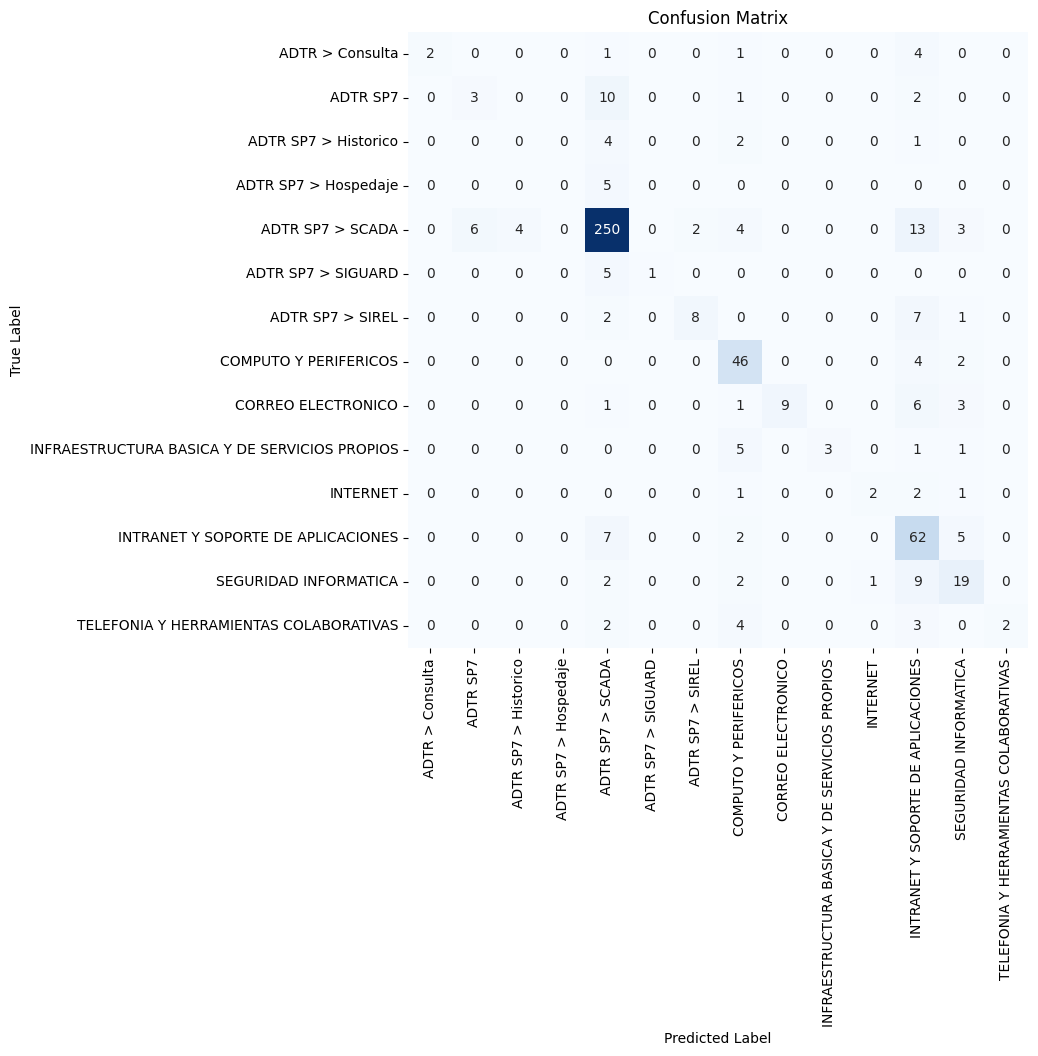

<Figure size 800x800 with 0 Axes>

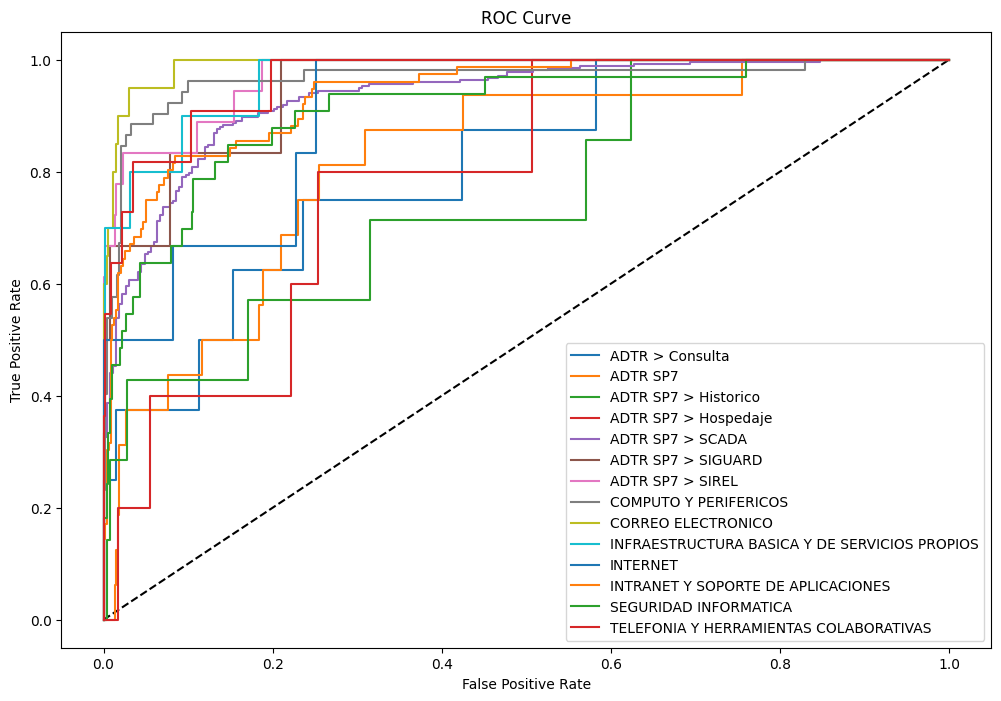

In [72]:
plot_confusion_matrix_and_roc(X_test, y_test, y_pred, grid_search.best_estimator_,  le.classes_)